1) Visualizar puntaje vs cambio en ir/no ir
2) Heatmap de puntaje promedio en alpha(0:10) vs beta(1:50), gamma en (-0.5,0.5)
3) 2,5 jugadores
4) Delta=100, epsilon=500, zeta=[1,3,6] con mejores parámetros de wsls

In [1]:
import EmergenceDCL as DL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
p = 0.6 # threshold
Pl = 5 # number of players
rounds = 50 # number of rounds
groups = 10 # number of groups
gameParameters = [p, Pl, rounds, groups]
TO_FILE = True

# 5 players:
playerParameters = {}
playerParameters['ALL'] = 0.05 # Bias towards ALL
playerParameters['NOTHING'] = 0.05 # Bias towards NOTHING
playerParameters['ALTER1'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER2'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER3'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER4'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER5'] = 0.05 # Bias towards 3-GO-2-STAY

# 2 players:
#playerParameters = {}
#playerParameters['ALL'] = 0.1 # Bias towards ALL
#playerParameters['NOTHING'] = 0.1 # Bias towards NOTHING
#playerParameters['ALTER1'] = 0.1 # Bias towards ALTER
#playerParameters['ALTER2'] = 0.1 # Bias towards ALTER

playerParameters['alpha'] = 5 # How much the focal region augments attractiveness
playerParameters['beta'] = 20 # Amplitude of the WSLS sigmoid function
playerParameters['gamma'] = -0.5 # Position of the WSLS sigmoid function
playerParameters['delta'] = 0 # How much the added FRA similarities augments attractiveness
playerParameters['epsilon'] = 0 # Amplitude of the FRA sigmoid function
playerParameters['zeta'] = 0 # Position of the FRA sigmoid function

for alpha in range(11):
    for beta in range(1,51):
        for gamma in [-0.5,0.5]:
            playerParameters['alpha'] = alpha
            playerParameters['beta'] = beta
            playerParameters['gamma'] = gamma
            E = DL.Experiment(gameParameters, playerParameters)
            if TO_FILE:
                with open('temp.csv', 'w') as dfile:
                    head = 'Group,Round,Player,Decision,Score,Strategy\n'
                    dfile.write(head)
                E.df = pd.read_csv('temp.csv')
            E.run_simulation()
            if TO_FILE:
                E.df = pd.read_csv('temp.csv')
                os.remove("temp.csv")
            E.df.insert(6,'Alpha',alpha)
            E.df.insert(7,'Beta',beta)
            E.df.insert(8,'Gamma',gamma)
            E.df.insert(9,'Consistency',0)
            for i in range(0,len(E.df)):
                if E.df['Round'].iloc[i] != 1: E.df['Consistency'].iloc[i] = int(E.df['Decision'].iloc[i]==E.df['Decision'].iloc[i-Pl])
            E.df.insert(10,'Players',Pl)
            E.df.to_csv('../Data/alpha{}_beta{}_gamma{}_5p.csv'.format(alpha,beta,gamma),index=False)

D:\Python\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
sims = pd.DataFrame()
dfs = os.listdir('../Data')
dfs = ['../Data/'+d for d in dfs]
for d in dfs:
    sims = pd.concat([sims,pd.read_csv(d)])
sims.to_csv('simulaciones_wsls.csv',index=False)

In [2]:
sims = pd.read_csv('simulaciones_wsls.csv')

In [3]:
sims.head(20)

,Group,Round,Player,Decision,Score,Strategy,Alpha,Beta,Gamma,Consistency,Players
0,6760673989,1,676066,0,0,0,0,10,-0.5,0,2
1,6760673989,1,73989,0,0,0,0,10,-0.5,0,2
2,6760673989,2,676066,0,0,2,0,10,-0.5,1,2
3,6760673989,2,73989,0,0,0,0,10,-0.5,1,2
4,6760673989,3,676066,0,0,3,0,10,-0.5,1,2
5,6760673989,3,73989,0,0,2,0,10,-0.5,1,2
6,6760673989,4,676066,1,1,0,0,10,-0.5,0,2
7,6760673989,4,73989,0,0,4,0,10,-0.5,1,2
8,6760673989,5,676066,1,1,1,0,10,-0.5,1,2
9,6760673989,5,73989,0,0,2,0,10,-0.5,1,2


In [4]:
sims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850000 entries, 0 to 3849999
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Group        object 
 1   Round        int64  
 2   Player       int64  
 3   Decision     int64  
 4   Score        int64  
 5   Strategy     int64  
 6   Alpha        int64  
 7   Beta         int64  
 8   Gamma        float64
 9   Consistency  int64  
 10  Players      int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 323.1+ MB


In [5]:
sims.describe()

,Round,Player,Decision,Score,Strategy,Alpha,Beta,Gamma,Consistency,Players
count,3.850000e+06,3.850000e+06,3.850000e+06,3.850000e+06,3.850000e+06,3.850000e+06,3.850000e+06,3850000.0,3.850000e+06,3.850000e+06
mean,2.550000e+01,5.008539e+05,5.128932e-01,1.208236e-01,1.804387e+00,5.000000e+00,2.550000e+01,0.0,5.388847e-01,4.142857e+00
std,1.443087e+01,2.888929e+05,4.998338e-01,7.059002e-01,2.207647e+00,3.162278e+00,1.443087e+01,0.5,4.984858e-01,1.355262e+00
min,1.000000e+00,3.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-0.5,0.000000e+00,2.000000e+00
25%,1.300000e+01,2.508388e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.300000e+01,-0.5,0.000000e+00,2.000000e+00
50%,2.550000e+01,5.013825e+05,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,2.550000e+01,0.0,1.000000e+00,5.000000e+00
75%,3.800000e+01,7.519125e+05,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,3.800000e+01,0.5,1.000000e+00,5.000000e+00
max,5.000000e+01,9.999270e+05,1.000000e+00,1.000000e+00,7.000000e+00,1.000000e+01,5.000000e+01,0.5,1.000000e+00,5.000000e+00


Todos los datos:

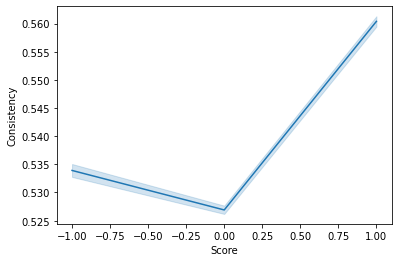

In [3]:
sns.lineplot(data=sims,x='Score',y='Consistency');

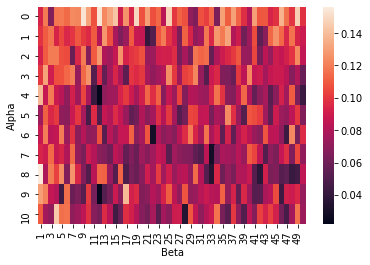

In [4]:
d = sims[sims['Gamma']==0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);

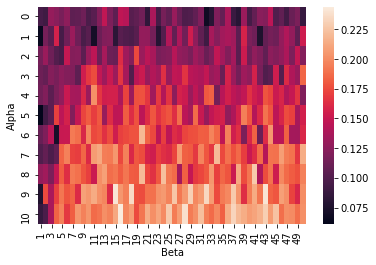

In [5]:
d = sims[sims['Gamma']==-0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);

2 jugadores:

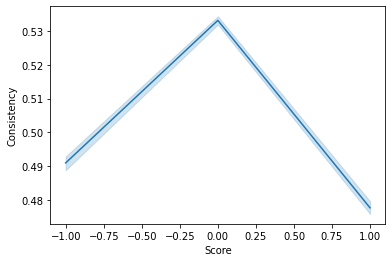

In [6]:
sims_2p = sims[sims['Players']==2]
sns.lineplot(data=sims_2p,x='Score',y='Consistency');

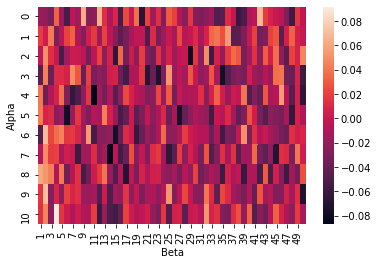

In [7]:
d = sims_2p[sims_2p['Gamma']==0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);

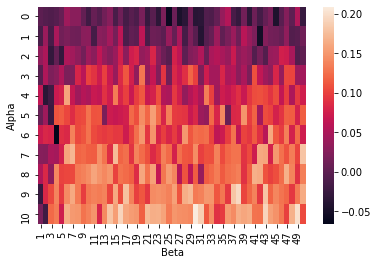

In [8]:
d = sims_2p[sims_2p['Gamma']==-0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);

5 jugadores:

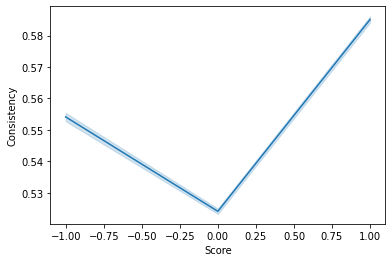

In [3]:
sims_5p = sims[sims['Players']==5]
sns.lineplot(data=sims_5p,x='Score',y='Consistency');

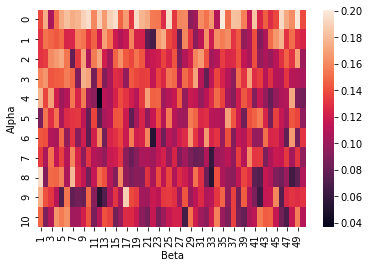

In [10]:
d = sims_5p[sims_5p['Gamma']==0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);

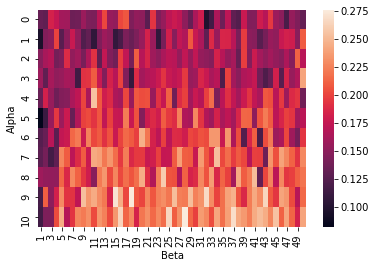

In [11]:
d = sims_5p[sims_5p['Gamma']==-0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);

FRA con mejores parámetros:

In [14]:
if sims_2p[sims_2p['Gamma']==-0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean).max().max() > sims_2p[sims_2p['Gamma']==0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean).max().max():
    mejor_gamma = -0.5
else:
    mejor_gamma = 0.5
d2 = sims_2p[sims_2p['Gamma']==mejor_gamma].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
loc_max = d2.isin([d2.max().max()])
mejor_alpha = np.where(d2.isin([d2.max().max()]).any(axis=1))[0][0]
mejor_beta = np.where(d2.isin([d2.max().max()]).any(axis=0))[0][0]+1
print('Mejor alpha',mejor_alpha,', Mejor beta', mejor_beta, ', Mejor gamma', mejor_gamma)

Mejor alpha 10 , Mejor beta 30 , Mejor gamma -0.5


In [2]:
mejor_alpha, mejor_beta, mejor_gamma = 10, 30, -0.5
p = 0.6 # threshold
Pl = 2 # number of players
rounds = 50 # number of rounds
groups = 10 # number of groups
gameParameters = [p, Pl, rounds, groups]
TO_FILE = True

playerParameters = {}
playerParameters['ALL'] = 0.1 # Bias towards ALL
playerParameters['NOTHING'] = 0.1 # Bias towards NOTHING
playerParameters['ALTER1'] = 0.1 # Bias towards ALTER
playerParameters['ALTER2'] = 0.1 # Bias towards ALTER

playerParameters['alpha'] = mejor_alpha # How much the focal region augments attractiveness
playerParameters['beta'] = mejor_beta # Amplitude of the WSLS sigmoid function
playerParameters['gamma'] = mejor_gamma # Position of the WSLS sigmoid function
playerParameters['delta'] = 100 # How much the added FRA similarities augments attractiveness
playerParameters['epsilon'] = 500 # Amplitude of the FRA sigmoid function
playerParameters['zeta'] = 0 # Position of the FRA sigmoid function
for zeta in [1,3,6]:
    playerParameters['zeta'] = zeta
    E = DL.Experiment(gameParameters, playerParameters)
    if TO_FILE:
        with open('temp.csv', 'w') as dfile:
            head = 'Group,Round,Player,Decision,Score,Strategy\n'
            dfile.write(head)
        E.df = pd.read_csv('temp.csv')
    E.run_simulation()
    if TO_FILE:
        E.df = pd.read_csv('temp.csv')
        os.remove("temp.csv")
    E.df.insert(6,'Zeta',zeta)
    E.df.insert(7,'Consistency',0)
    for i in range(0,len(E.df)):
        if E.df['Round'].iloc[i] != 1: E.df['Consistency'].iloc[i] = int(E.df['Decision'].iloc[i]==E.df['Decision'].iloc[i-Pl])
    E.df.insert(8,'Players',Pl)
    E.df.to_csv('../Data/FRA_players{}_zeta{}.csv'.format(Pl,zeta),index=False)

In [4]:
if sims_5p[sims_5p['Gamma']==-0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean).max().max() > sims_5p[sims_5p['Gamma']==0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean).max().max():
    mejor_gamma = -0.5
else:
    mejor_gamma = 0.5
d5 = sims_5p[sims_5p['Gamma']==mejor_gamma].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
loc_max = d5.isin([d5.max().max()])
mejor_alpha = np.where(d5.isin([d5.max().max()]).any(axis=1))[0][0]
mejor_beta = np.where(d5.isin([d5.max().max()]).any(axis=0))[0][0]+1
print('Mejor alpha',mejor_alpha,', Mejor beta', mejor_beta, ', Mejor gamma', mejor_gamma)

Mejor alpha 10 , Mejor beta 28 , Mejor gamma -0.5


In [6]:
mejor_alpha, mejor_beta, mejor_gamma = 10, 28, -0.5
p = 0.6 # threshold
Pl = 5 # number of players
rounds = 50 # number of rounds
groups = 10 # number of groups
gameParameters = [p, Pl, rounds, groups]
TO_FILE = True

playerParameters = {}
playerParameters['ALL'] = 0.05 # Bias towards ALL
playerParameters['NOTHING'] = 0.05 # Bias towards NOTHING
playerParameters['ALTER1'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER2'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER3'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER4'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER5'] = 0.05 # Bias towards 3-GO-2-STAY

playerParameters['alpha'] = mejor_alpha # How much the focal region augments attractiveness
playerParameters['beta'] = mejor_beta # Amplitude of the WSLS sigmoid function
playerParameters['gamma'] = mejor_gamma # Position of the WSLS sigmoid function
playerParameters['delta'] = 100 # How much the added FRA similarities augments attractiveness
playerParameters['epsilon'] = 500 # Amplitude of the FRA sigmoid function
playerParameters['zeta'] = 0 # Position of the FRA sigmoid function
for zeta in [1,3,6]:
    playerParameters['zeta'] = zeta
    E = DL.Experiment(gameParameters, playerParameters)
    if TO_FILE:
        with open('temp.csv', 'w') as dfile:
            head = 'Group,Round,Player,Decision,Score,Strategy\n'
            dfile.write(head)
        E.df = pd.read_csv('temp.csv')
    E.run_simulation()
    if TO_FILE:
        E.df = pd.read_csv('temp.csv')
        os.remove("temp.csv")
    E.df.insert(6,'Zeta',zeta)
    E.df.insert(7,'Consistency',0)
    for i in range(0,len(E.df)):
        if E.df['Round'].iloc[i] != 1: E.df['Consistency'].iloc[i] = int(E.df['Decision'].iloc[i]==E.df['Decision'].iloc[i-Pl])
    E.df.insert(8,'Players',Pl)
    E.df.to_csv('../Data/FRA_players{}_zeta{}.csv'.format(Pl,zeta),index=False)

D:\Python\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
sims = pd.DataFrame()
dfs = os.listdir('../Data')
dfs = ['../Data/'+d for d in dfs]
for d in dfs:
    sims = pd.concat([sims,pd.read_csv(d)])
sims.to_csv('simulaciones_fra.csv',index=False)

In [2]:
sims = pd.read_csv('simulaciones_fra.csv')

In [3]:
sims.head()

,Group,Round,Player,Decision,Score,Strategy,Zeta,Consistency,Players
0,2665368821,1,266530,1,-1,0,1,0,2
1,2665368821,1,688210,1,-1,0,1,0,2
2,2665368821,2,266530,0,0,2,1,0,2
3,2665368821,2,688210,0,0,2,1,0,2
4,2665368821,3,266530,1,1,0,1,0,2


In [4]:
sims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Group        10500 non-null  object
 1   Round        10500 non-null  int64 
 2   Player       10500 non-null  int64 
 3   Decision     10500 non-null  int64 
 4   Score        10500 non-null  int64 
 5   Strategy     10500 non-null  int64 
 6   Zeta         10500 non-null  int64 
 7   Consistency  10500 non-null  int64 
 8   Players      10500 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 738.4+ KB


In [5]:
sims.describe()

,Round,Player,Decision,Score,Strategy,Zeta,Consistency,Players
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,25.500000,508199.871429,0.511048,0.110857,0.280095,3.333333,0.493333,4.142857
std,14.431557,288718.951245,0.499902,0.706262,1.093288,2.054903,0.499979,1.355326
min,1.000000,2578.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,2.000000
25%,13.000000,251451.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,25.500000,524547.500000,1.000000,0.000000,0.000000,3.000000,0.000000,5.000000
75%,38.000000,770784.000000,1.000000,1.000000,0.000000,6.000000,1.000000,5.000000
max,50.000000,994479.000000,1.000000,1.000000,7.000000,6.000000,1.000000,5.000000


Todos los datos:

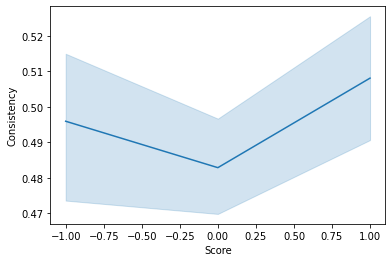

In [6]:
sns.lineplot(data=sims,x='Score',y='Consistency');

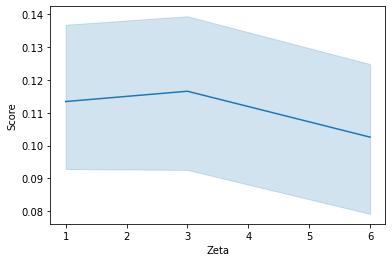

In [11]:
sns.lineplot(data=sims,x='Zeta',y='Score');

2 jugadores:

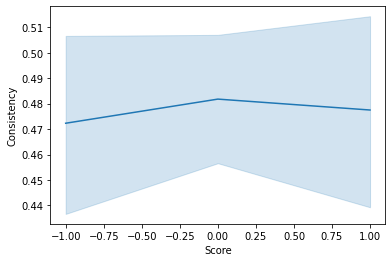

In [10]:
sims_2p = sims[sims['Players']==2]
sns.lineplot(data=sims_2p,x='Score',y='Consistency');

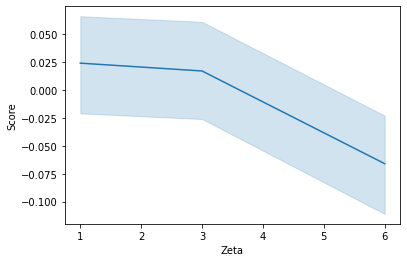

In [12]:
sns.lineplot(data=sims_2p,x='Zeta',y='Score');

5 jugadores:

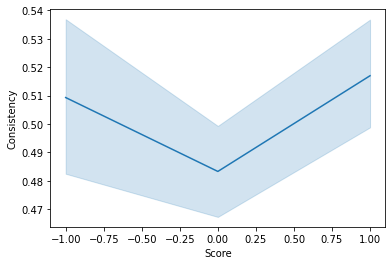

In [13]:
sims_5p = sims[sims['Players']==5]
sns.lineplot(data=sims_5p,x='Score',y='Consistency');

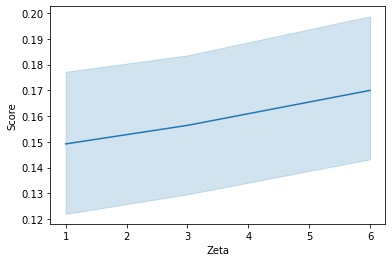

In [14]:
sns.lineplot(data=sims_5p,x='Zeta',y='Score');